In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [10]:
data = pd.read_csv('./Titanic.csv')

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [13]:
data = data.drop(columns = cols_drop)

In [14]:
data.head()
# pd.unique(data['Embarked'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
lab_enc = LabelEncoder()
data['Sex'] = lab_enc.fit_transform(data['Sex'])
data['Embarked'] = lab_enc.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [16]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [17]:
data = data.fillna(data['Age'].mean())

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [19]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
output_col = ['Survived']

X_data = data[input_cols]
Y_data = data['Survived']
X_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [20]:
print(X_data.shape, Y_data.shape)

(891, 7) (891,)


In [21]:
X_data = X_data.values
Y_data = Y_data.values

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,train_size = 0.8)

In [23]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [24]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [25]:
accuracy_score(y_train,clf.predict(x_train))

0.8033707865168539

In [26]:
accuracy_score(y_test,clf.predict(x_test))

0.7877094972067039

In [38]:
xt = np.array([[2,1,30,1,0,10,0]])
xt = scale.transform(xt)
xt

array([[-0.35949991,  0.73334642, -0.01105172,  0.43082551, -0.46433519,
        -0.43952945, -1.9347716 ]])

In [39]:
clf.predict(xt)

array([0], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
ypred = [1,1,0,0,0,1,0,1,1,0]
yac = [1,0,0,0,1,1,0,1,0,1]

In [31]:
cm = confusion_matrix(yac,ypred)

<Axes: >

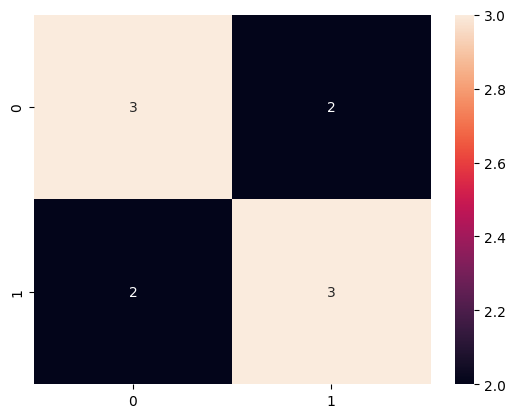

In [32]:
sns.heatmap(cm,annot=True)

<Axes: >

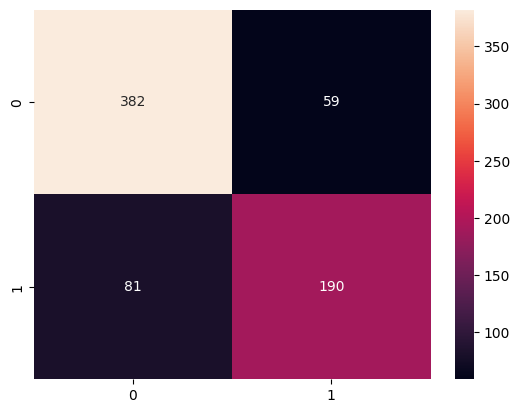

In [33]:
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train)),annot = True,fmt='g')

In [34]:
print(classification_report(yac,ypred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



In [35]:
print(classification_report(y_train,clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       441
           1       0.76      0.70      0.73       271

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [45]:
fpr,tpr,_ = roc_curve(y_train,clf.predict_proba(x_train)[:,1],pos_label=1)

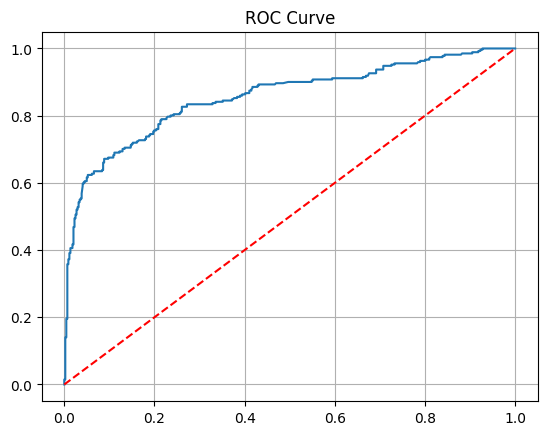

In [46]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.grid()
plt.title('ROC Curve')
plt.show()

In [42]:
clf.predict_proba(x_train)

array([[0.0161881 , 0.9838119 ],
       [0.81280795, 0.18719205],
       [0.5027774 , 0.4972226 ],
       ...,
       [0.55029033, 0.44970967],
       [0.93927729, 0.06072271],
       [0.57975571, 0.42024429]])